In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import math

# wet-bulb temparature points
tw_readings = np.array([35, 27, 18, 10, -20])
tw_scores = np.array([100, 75, 0, 50, 65])
# CO points
co_who_time = np.array([15, 30, 60, 480])
co_who_readings = np.array([90, 50, 25, 10])
co_readings = np.array([0, 10, 90])
co_scores = np.array([75, 50, 0])
# CO2 points
co2_readings = np.array([400, 1000, 2000, 5000])
co2_scores = np.array([25, 50, 75, 100])
# NO2 points
no2_readings = np.array([0, 0.1, 5])
no2_scores = np.array([0,50,75])
# Ozone points
o3_aqi_reading = np.array([0.125, 0.071])
o3_aqi_times = np.array([60, 480])
o3_readings = np.array([0, 0.1])
o3_scores = np.array([0, 75])
# PM2.5 points
pm25_readings = np.array([12, 55, 150, 350])
pm25_scores = np.array([25, 50, 75, 100])
# PM10 points
pm10_readings = np.array([50, 254, 355, 604])
pm10_scores = np.array([25, 50, 75, 100])
# TVOC points
tvoc_readings = np.array([0.3, 0.5, 1, 3])
tvoc_scores = np.array([25, 50, 75, 100])
# Noise points
noise_readings = np.array([0, 40, 60, 80, 120])
noise_scores = np.array([0, 25, 50, 75, 100])
# Ethanol points
eth_readings = np.array([0, 1000])
eth_scores = np.array([0, 100])

In [2]:
def delimiter(val):
    for i in range(len(val)):
        if (val[i] > 100):
            val[i] = 100
        elif (val[i] < 0):
            val[i] = 0
        else:
            continue
    return val

# y = Ax + B
def y_poly(p, a, b):
    return (a * p) + b

# y = x^2 + Ax + B
def y_poly2(p, a, b, c):
    return a*(p**2) + (b * p) + c

# y = x^3 + Ax^2 + Bx + C
def y_poly3(p, a, b, c, d):
    return a*(p**3) + b*(p**2) + (c * p) + d

# y = x^4 + Ax^3 + Bx^2 + Cx + D
def y_poly4(p, a, b, c, d, e):
    return a*(p**4) + b*(p**3) + c*(p**2) + (d * p) + e

# y = x^5 + Ax^4 + Bx^3 + Cx^2 + Dx + E
def y_poly5(p, a, b, c, d, e, f):
    return a*(p**5) + b*(p**4) + c*(p**3) + d*(p**2) + (e * p) + f

# y = x^6 + Ax^5 + Bx^4 + Cx^3 + Dx^2 + Ex + F
def y_poly6(p, a, b, c, d, e, f, g):
    return a*(p**6) + b*(p**5) + c*(p**4) + d*(p**3) + e*(p**2) + (f * p) + g

# y = Ax^B
def y_exp(p, a, b):
    return a*(p**b)

# y = 116.1985 + (8.80154 - 116.1985)/(1 + (x/1414.214)^1.368414)
# y = A + (B/(1 + (Cx)^D))
def y_curve1(p, a, b, c, d):
    return a + (b/(1+c/p)**d)

[ 3.82468222e-03 -2.62803778e-02 -2.38058131e+00  5.89700680e+01]
r2 score: 0.46572275737043756
[-1.23709262e-03  6.47697081e-02 -1.20204332e-01 -2.73184189e+01
  2.82805840e+02]
r2 score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Text(0.5, 0, 'Temperature')

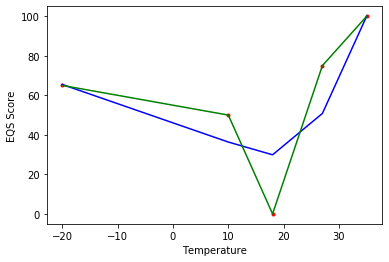

In [3]:
tw_consts,cov = curve_fit(y_poly3, tw_readings, tw_scores)
print(tw_consts)

tw_scores_model = delimiter(y_poly3(tw_readings, tw_consts[0], tw_consts[1], tw_consts[2], tw_consts[3]))
print('r2 score:', r2_score(tw_scores_model, tw_scores))

tw_consts2,cov = curve_fit(y_poly4, tw_readings, tw_scores)
print(tw_consts2)

tw_scores_model2 = delimiter(y_poly4(tw_readings, tw_consts2[0], tw_consts2[1], tw_consts2[2], tw_consts2[3], tw_consts2[4]))
print('r2 score:', r2_score(tw_scores_model2, tw_scores))

plt.plot(tw_readings, tw_scores,'r.')
plt.plot(tw_readings, tw_scores_model, 'b-')
plt.plot(tw_readings, tw_scores_model2, 'g-')
plt.ylabel("EQS Score")
plt.xlabel("Temperature")

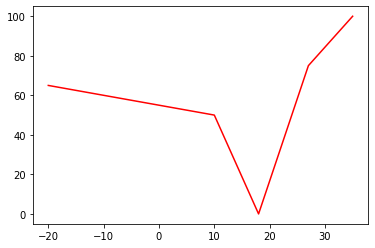

In [4]:
# Final wet-bulb model
tw_scores_model3 = delimiter(y_poly4(tw_readings,-1.23709262e-03, 6.47697081e-02, -1.20204332e-01, -2.73184189e+01, 2.82805840e+02))
plt.plot(tw_readings, tw_scores_model3, 'r-')

[ 6.61549908e+04 -2.13976492e+00]
r2 score: -22.92543894358868


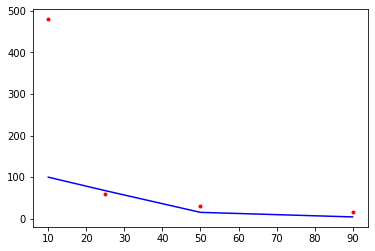

In [5]:
co_who_consts,cov = curve_fit(y_exp, co_who_readings, co_who_time)
print(co_who_consts)

co_who_times_model = delimiter(y_exp(co_who_readings, co_who_consts[0], co_who_consts[1]))
print('r2 score:', r2_score(co_who_times_model, co_who_time))

plt.plot(co_who_readings, co_who_time,'r.')
plt.plot(co_who_readings, co_who_times_model, 'b')

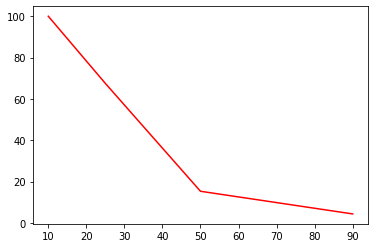

In [6]:
# Final CO time model 
co_who_times_model3 = delimiter(y_exp(co_who_readings, 6.61549908e+04, -2.13976492e+00))

plt.plot(co_who_readings, co_who_times_model, 'r-')

[-5.05243336e-06  4.33185708e-02  9.62634873e+00]
r2 score: 0.9977960083371545
[ 1.35869565e-09 -1.50362319e-05  6.05978261e-02  3.07971014e+00]
r2 score: -3.3099302138052096


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


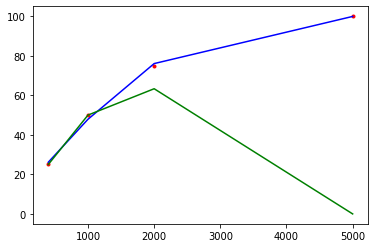

In [7]:
# co2_readings, co2_scores
co2_consts,cov = curve_fit(y_poly2, co2_readings, co2_scores)
print(co2_consts)

co2_scores_model = delimiter(y_poly2(co2_readings, co2_consts[0], co2_consts[1], co2_consts[2]))
print('r2 score:', r2_score(co2_scores_model, co2_scores))

co2_consts2,cov = curve_fit(y_poly3, co2_readings, co2_scores)
print(co2_consts2)

co2_scores_model2 = delimiter(y_poly3(co2_readings, co2_consts2[0], co2_consts2[1], co2_consts2[2], co2_consts2[3]))
print('r2 score:', r2_score(co2_scores_model2, co2_scores))

plt.plot(co2_readings, co2_scores,'r.')
plt.plot(co2_readings, co2_scores_model, 'b-')
plt.plot(co2_readings, co2_scores_model2, 'g-')


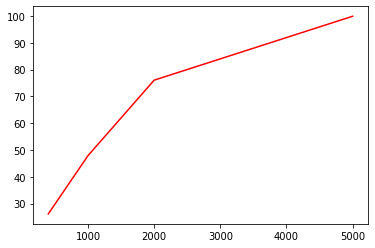

In [8]:
# Final CO2 time model 
co2_scores_model3 = delimiter(y_poly2(co2_readings, -5.05243336e-06, 4.33185708e-02, 9.62634873e+00))
plt.plot(co2_readings, co2_scores_model3, 'r-')

[10.25091801 24.24010605]
r2 score: 0.3013291773391068
[-9.89795919e+01  5.09897959e+02  3.79047244e-20]
r2 score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


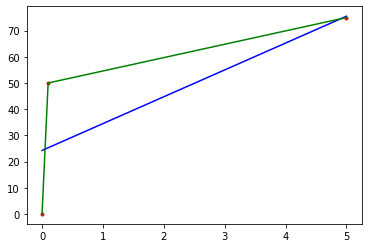

In [9]:
# no2_readings, no2_scores
no2_consts,cov = curve_fit(y_poly, no2_readings, no2_scores)
print(no2_consts)

no2_scores_model = delimiter(y_poly(no2_readings, no2_consts[0], no2_consts[1]))
print('r2 score:', r2_score(no2_scores_model, no2_scores))

no2_consts2,cov = curve_fit(y_poly2, no2_readings, no2_scores)
print(no2_consts2)

no2_scores_model2 = delimiter(y_poly2(no2_readings, no2_consts2[0], no2_consts2[1], no2_consts2[2]))
print('r2 score:', r2_score(no2_scores_model2, no2_scores))

plt.plot(no2_readings, no2_scores,'r.')
plt.plot(no2_readings, no2_scores_model, 'b-')
plt.plot(no2_readings, no2_scores_model2, 'g-')

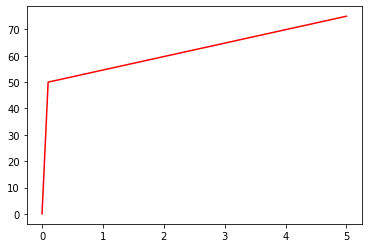

In [10]:
# Final NO2 model 
no2_scores_model3 = delimiter(y_poly2(no2_readings, -9.89795919e+01, 5.09897959e+02, 0))
plt.plot(no2_readings, no2_scores_model3, 'r-')

[-1.28571429e-04  1.32714286e-01]
r2 score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


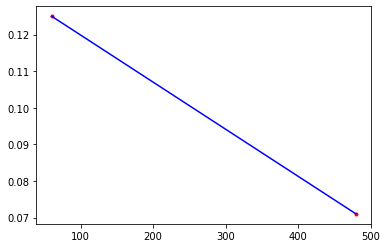

In [11]:
# o3_aqi_reading, o3_aqi_times 
o3_consts,cov = curve_fit(y_poly, o3_aqi_times, o3_aqi_reading)
print(o3_consts)

o3_reading_model = delimiter(y_poly(o3_aqi_times, o3_consts[0], o3_consts[1]))
print('r2 score:', r2_score(o3_reading_model, o3_aqi_reading))

plt.plot(o3_aqi_times, o3_aqi_reading,'r.')
plt.plot(o3_aqi_times, o3_reading_model, 'b-')

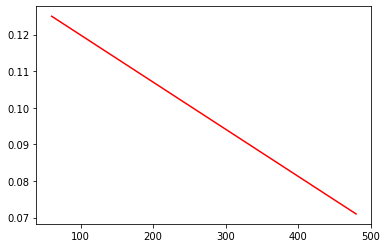

In [12]:
# Final 03 time model 
o3_scores_model3 = delimiter(y_poly(o3_aqi_times, -1.28571429e-04, 1.32714286e-01))
plt.plot(o3_aqi_times, o3_scores_model3, 'r-')

[ 0.20447145 33.5161715 ]
r2 score: 0.8906722311512696
[-7.21522673e-04  4.74950569e-01  2.19025801e+01]
r2 score: 0.9912059084560431


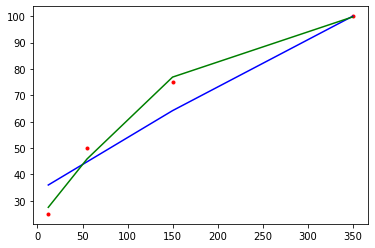

In [13]:
# pm25_readings, pm25_scores
pm25_consts,cov = curve_fit(y_poly, pm25_readings, pm25_scores)
print(pm25_consts)

pm25_scores_model = delimiter(y_poly(pm25_readings, pm25_consts[0], pm25_consts[1]))
print('r2 score:', r2_score(pm25_scores_model, pm25_scores))

pm25_consts2,cov = curve_fit(y_poly2, pm25_readings, pm25_scores)
print(pm25_consts2)

pm25_scores_model2 = delimiter(y_poly2(pm25_readings, pm25_consts2[0], pm25_consts2[1], pm25_consts2[2]))
print('r2 score:', r2_score(pm25_scores_model2, pm25_scores))

plt.plot(pm25_readings, pm25_scores,'r.')
plt.plot(pm25_readings, pm25_scores_model, 'b-')
plt.plot(pm25_readings, pm25_scores_model2, 'g-')

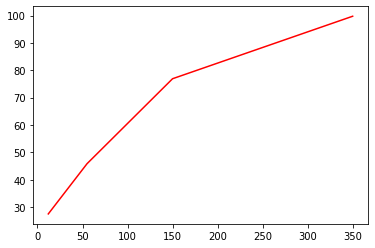

In [14]:
# Final PM2.5 model 
pm25_scores_model3 = delimiter(y_poly2(pm25_readings, -7.21522673e-04, 4.74950569e-01, 2.19025801e+01))
plt.plot(pm25_readings, pm25_scores_model3, 'r-')

[-1.49839052e-06  1.39719585e-03 -1.82752821e-01  3.08319502e+01]
r2 score: 1.0
[-4.69422877e-05  1.69665921e-01  1.54747566e+01]
r2 score: 0.9802836610740292


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


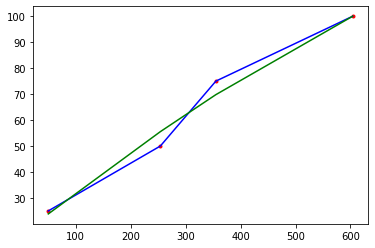

In [15]:
# pm10_readings, pm10_scores
pm10_consts,cov = curve_fit(y_poly3, pm10_readings, pm10_scores)
print(pm10_consts)

pm10_scores_model = delimiter(y_poly3(pm10_readings, pm10_consts[0], pm10_consts[1], pm10_consts[2], pm10_consts[3]))
print('r2 score:', r2_score(pm10_scores_model, pm10_scores))

pm10_consts2,cov = curve_fit(y_poly2, pm10_readings, pm10_scores)
print(pm10_consts2)

pm10_scores_model2 = delimiter(y_poly2(pm10_readings, pm10_consts2[0], pm10_consts2[1], pm10_consts2[2]))
print('r2 score:', r2_score(pm10_scores_model2, pm10_scores))

plt.plot(pm10_readings, pm10_scores,'r.')
plt.plot(pm10_readings, pm10_scores_model, 'b-')
plt.plot(pm10_readings, pm10_scores_model2, 'g-')

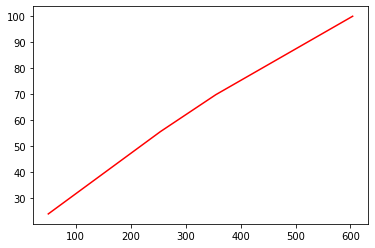

In [16]:
# Final PM10 model 
pm10_scores_model3 = delimiter(y_poly2(pm10_readings, -4.69422877e-05, 1.69665921e-01, 1.54747566e+01))
plt.plot(pm10_readings, pm10_scores_model3, 'r-')

[23.47161578 34.33406107]
r2 score: 0.7291760634806108
[-21.32720492  96.78504677   1.48876859]
r2 score: 0.9848944627505204


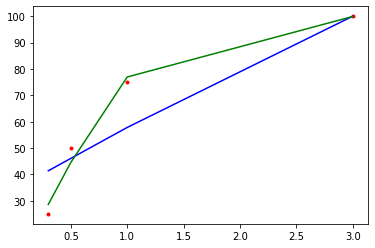

In [17]:
# tvoc_readings, tvoc_scores
tvoc_consts,cov = curve_fit(y_poly, tvoc_readings, tvoc_scores)
print(tvoc_consts)

tvoc_scores_model = delimiter(y_poly(tvoc_readings, tvoc_consts[0], tvoc_consts[1]))
print('r2 score:', r2_score(tvoc_scores_model, tvoc_scores))

tvoc_consts2,cov = curve_fit(y_poly2, tvoc_readings, tvoc_scores)
print(tvoc_consts2)

tvoc_scores_model2 = delimiter(y_poly2(tvoc_readings, tvoc_consts2[0], tvoc_consts2[1], tvoc_consts2[2]))
print('r2 score:', r2_score(tvoc_scores_model2, tvoc_scores))

plt.plot(tvoc_readings, tvoc_scores,'r.')
plt.plot(tvoc_readings, tvoc_scores_model, 'b-')
plt.plot(tvoc_readings, tvoc_scores_model2, 'g-')

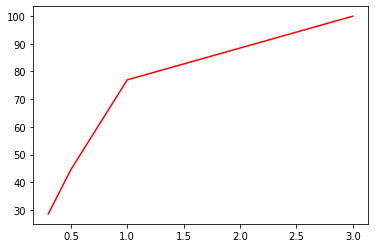

In [18]:
# Final TVOC model 
tvoc_scores_model3 = delimiter(y_poly2(tvoc_readings, -21.32720492, 96.78504677, 1.48876859))

plt.plot(tvoc_readings, tvoc_scores_model3, 'r-')

[ 0.875 -2.5  ]
r2 score: 0.9799554565701254
[-2.1813662e-12  8.7500000e-01 -2.5000000e+00]
r2 score: 0.9799554565701559


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


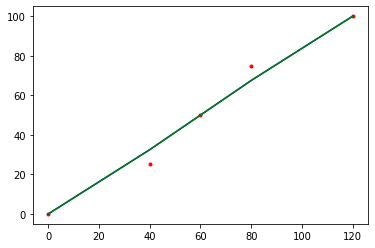

In [19]:
# noise_readings, noise_scores
noise_consts,cov = curve_fit(y_poly, noise_readings, noise_scores)
print(noise_consts)

noise_scores_model = delimiter(y_poly(noise_readings, noise_consts[0], noise_consts[1]))
print('r2 score:', r2_score(noise_scores_model, noise_scores))

noise_consts2,cov = curve_fit(y_poly2, noise_readings, noise_scores)
print(noise_consts2)

noise_scores_model2 = delimiter(y_poly2(noise_readings, noise_consts2[0], noise_consts2[1], noise_consts2[2]))
print('r2 score:', r2_score(noise_scores_model2, noise_scores))

plt.plot(noise_readings, noise_scores,'r.')
plt.plot(noise_readings, noise_scores_model, 'b-')
plt.plot(noise_readings, noise_scores_model2, 'g-')

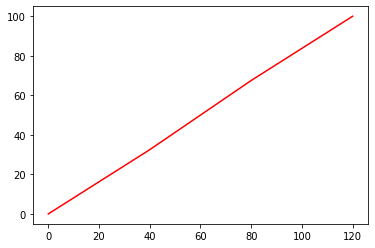

In [20]:
# Final Noise model 
noise_scores_model3 = delimiter(y_poly(noise_readings, 0.875, -2.5))

plt.plot(noise_readings, noise_scores_model3, 'r-')

[1.00000000e-01 4.75750021e-24]
r2 score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


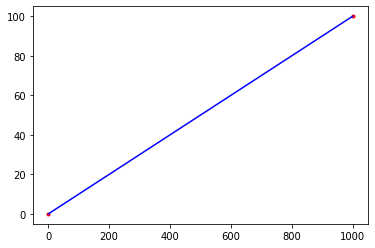

In [21]:
# eth_readings, eth_scores
eth_consts,cov = curve_fit(y_poly, eth_readings, eth_scores)
print(eth_consts)

eth_scores_model = delimiter(y_poly(eth_readings, eth_consts[0], eth_consts[1]))
print('r2 score:', r2_score(eth_scores_model, eth_scores))

plt.plot(eth_readings, eth_scores,'r.')
plt.plot(eth_readings, eth_scores_model, 'b-')

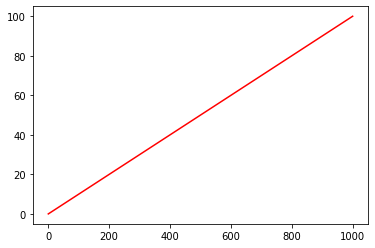

In [22]:
# Final Ethanol model 
eth_scores_model3 = delimiter(y_poly(eth_readings, 0.1, 0))

plt.plot(eth_readings, eth_scores_model3, 'r-')